## EE219 Project 5: Popularity Prediction on Twitter

### Team members:
* **Yin Fei** 404284074

* **Yichen Wu** 504294181

* **Siyuan Chen** 405024391

* **Ruchen Zhen** 205036408

### Required Packages:
python 3.6  
numpy v1.14.0  
scikit-learn v0.19.1  
scipy v1.0.0  
matplotlib v2.1.2  
tabulate v0.8.2  

### Part 1: Popularity Prediction

#### Problem 1.1

In [66]:
import json, os, sys
import pickle

data_path = "./tweet_data"

filelist = []
tweetslist = []
retweetslist = []
numuserlist = []
followerslist = []
mindatalist = []
maxdatalist = []

if os.path.isfile("./tweet_features1a.pkl"):
    tweet_features1a = pickle.load(open("./tweet_features1a.pkl", "rb"))
    [filelist, tweetslist, retweetslist, numuserlist,\
     followerslist, mindatalist, maxdatalist, ] = tweet_features1a
else:
    for file_name in os.listdir(data_path):
        user = {}
        filelist.append(file_name)
        number_of_tweets = 0
        number_of_retweets = 0
        number_of_followers = 0
        min_data = sys.maxsize
        max_data = 0
        if file_name.endswith(".txt"):
            with open(os.path.join(data_path,file_name)) as text:
                print ("loaded " + file_name)
                for i, line in enumerate(text):
                    json_object = json.loads(line)
                    number_of_tweets += 1
                    username = json_object['author']['nick']
                    if username not in user:
                        number_of_followers += json_object['author']['followers']
                        user[username] = True
                    number_of_retweets += json_object['metrics']['citations']['total']
                    t = json_object['citation_date']
                    if t > max_data:
                        max_data = t
                    if t < min_data:
                        min_data = t
                tweetslist.append(number_of_tweets)
                retweetslist.append(number_of_retweets)
                numuserlist.append(len(user))
                followerslist.append(number_of_followers)
                mindatalist.append(min_data)
                maxdatalist.append(max_data)
    
    tweet_features1a = [filelist, tweetslist, retweetslist, numuserlist,\
                      followerslist, mindatalist, maxdatalist]
    pickle.dump(tweet_features1a, open("./tweet_features1a.pkl", "wb")) 
            

In [67]:
import numpy as np
taglist = [x[7:-4] for x in filelist]
followerslist = list(map(int, followerslist))
difftime = np.subtract(maxdatalist,mindatalist)

from tabulate import tabulate
print(tabulate(np.array([taglist, tweetslist, retweetslist, numuserlist, \
                         followerslist, difftime]).transpose(), \
         headers=['Tag','#tweets','#retweets', '#users', '#followers', 'duration(s)']))

Tag            #tweets    #retweets    #users    #followers    duration(s)
-----------  ---------  -----------  --------  ------------  -------------
#gohawks        188136       379022     77584     123199757        2081588
#gopatriots      26232        36727     18087      23413561        2066664
#nfl            259024       398517     75642     319346589        2112932
#patriots       489713       873068    327326     554816498        2112462
#sb49           826951      2076597    590636    1329185117        2096661
#superbowl     1348767      3221223    693087    2634415672        2108821


In [68]:
diffhour = difftime/3600

avgtweetsperhour = np.array(tweetslist) / np.array(diffhour)
avgfollowers = np.array(followerslist) / np.array(numuserlist)
avgnumofretweets = np.array(retweetslist) / np.array(tweetslist)

print(tabulate(np.array([taglist, avgtweetsperhour, avgfollowers, \
                         avgnumofretweets]).transpose(), \
         headers=['Tag','avg_tweets_per_hour','avg_followers', 'avg_#_of_retweets']))

Tag            avg_tweets_per_hour    avg_followers    avg_#_of_retweets
-----------  ---------------------  ---------------  -------------------
#gohawks                  325.372           1587.95              2.01462
#gopatriots                45.6945          1294.5               1.40008
#nfl                      441.323           4221.82              1.53853
#patriots                 834.556           1695                 1.78282
#sb49                    1419.89            2250.43              2.51115
#superbowl               2302.5             3800.99              2.38827


#### #Superbowl

In [69]:
superbowl_bar = {}

if os.path.isfile("./superbowl_bar.pkl"):
    superbowl_bar = pickle.load(open("./superbowl_bar.pkl", "rb"))
else:
    file_name='tweets_#superbowl.txt'
    with open(os.path.join(data_path, file_name)) as text:
        for i, line in enumerate(text):
            json_object = json.loads(line)
            t = int(json_object['citation_date']/3600)
            if t in superbowl_bar.keys():
                superbowl_bar[t] += 1
            else:
                superbowl_bar[t] = 1
    pickle.dump(superbowl_bar, open("./superbowl_bar.pkl", "wb")) 

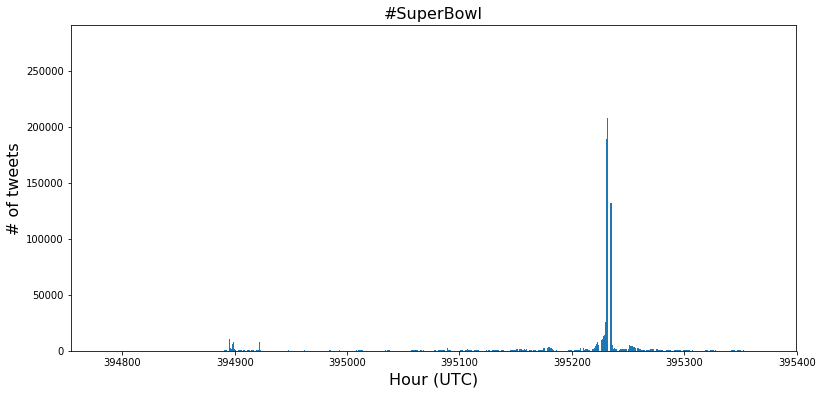

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
plt.bar(superbowl_bar.keys(), superbowl_bar.values())
plt.xlabel('Hour (UTC)', fontsize=16)
plt.ylabel('# of tweets', fontsize=16)
plt.title('#SuperBowl', fontsize=16)
plt.show()

#### #NFL

In [71]:
nfl_bar = {}

if os.path.isfile("./nfl_bar.pkl"):
    nfl_bar = pickle.load(open("./nfl_bar.pkl", "rb"))
else:
    file_name='tweets_#nfl.txt'
    with open(os.path.join(data_path, file_name)) as text:
        for i, line in enumerate(text):
            json_object = json.loads(line)
            t = int(json_object['citation_date']/3600)
            if t in nfl_bar.keys():
                nfl_bar[t] += 1
            else:
                nfl_bar[t] = 1
    pickle.dump(nfl_bar, open("./nfl_bar.pkl", "wb")) 

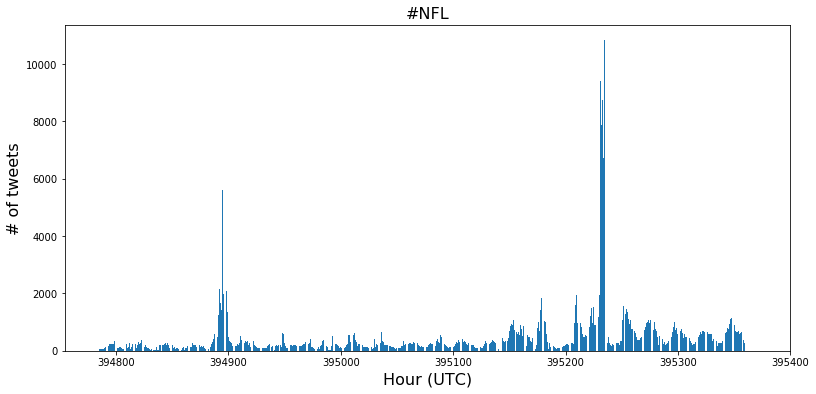

In [72]:
plt.figure(figsize=(13, 6))
plt.bar(nfl_bar.keys(), nfl_bar.values())
plt.xlabel('Hour (UTC)', fontsize=16)
plt.ylabel('# of tweets', fontsize=16)
plt.title('#NFL', fontsize=16)
plt.show()

#### problem 1.2

In [77]:
import datetime, time
import pytz
pst_tz = pytz.timezone('US/Pacific')

tweet_features1b = []

if os.path.isfile("./tweet_features1b.pkl"):
    tweet_features1b = pickle.load(open("./tweet_features1b.pkl", "rb"))
#    [ntweets, nretweets, sumfollowers, maxfollowers, hour] = tweet_features1b
else:
    # tag_hr: [ntweets, nretweets, sumfollowers, maxfollowers, hour]
    for idx, file_name in enumerate(filelist):
        min_hr = mindatalist[idx]//3600
        max_hr = maxdatalist[idx]//3600
        num_hr = max_hr - min_hr + 1
        tag_hr = np.zeros([num_hr, 5])
        
        time = datetime.datetime.fromtimestamp(mindatalist[idx], pst_tz)
        tag_hr[0][4] = time.hour
        for n in range(1, num_hr):
            tag_hr[n][4] = (tag_hr[n-1][4] + 1) % 24
            
        with open(os.path.join(data_path, file_name)) as text:
            print ("loaded " + file_name)

            for i, line in enumerate(text):
                json_object = json.loads(line)
                hr = int(json_object['citation_date']/3600) - min_hr
                tag_hr[hr][0] += 1
                tag_hr[hr][1] += json_object['metrics']['citations']['total']
                tag_hr[hr][2] += json_object['author']['followers']
                if json_object['author']['followers'] > tag_hr[hr][3]:
                    tag_hr[hr][3]=json_object['author']['followers']
    
        tweet_features1b.append(tag_hr)
    pickle.dump(tweet_features1b, open("./tweet_features1b.pkl", "wb")) 
            

In [101]:
wer = np.random.rand(4)
wer2 = wer*2
print(wer, wer2)

[ 0.33623426  0.59660805  0.52408011  0.09163281] [ 0.67246853  1.19321609  1.04816022  0.18326562]


In [103]:
import statsmodels.api as sm

N = 5 # N-hour window used as feature
for idx, tag in enumerate(taglist):
    X = tweet_features1b[idx][:-N, :]
    for i in range(1,N):
        X = np.concatenate((X, tweet_features1b[idx][i:(-N+i), :]), axis=1)
    y = tweet_features1b[idx][N:, 0]
    print("Linear Regression Model using %d-hr window for %s \n" % (N, tag), "-"*77)
    mod = sm.OLS(y,X)
    res = mod.fit()
    print(res.summary())
    print("\n"*4)

Linear Regression Model using 5-hr window for #gohawks 
 -----------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     31.93
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           2.51e-90
Time:                        18:20:15   Log-Likelihood:                -4708.0
No. Observations:                 574   AIC:                             9466.
Df Residuals:                     549   BIC:                             9575.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

### Part 2

In [65]:
#superbowl
import json,os
file_name='tweets_#superbowl.txt'
data_path = "./tweet_data"
X=[]
y=[]
locationlist=[]
inlist_w=['washington','WA','Washington']
notinlist_w=['DC','D.C.']
inlist_m=['Massachusetts','massachusetts','MA']
with open(os.path.join(data_path,file_name)) as text:
    for i, line in enumerate(text):
        json_object = json.loads(line)
        if any(v1 in json_object['tweet']['user']['location'] for v1 in inlist_w)\
        and all(v2 not in json_object['tweet']['user']['location'] for v2 in notinlist_w):
            X.append(json_object['tweet']['text'])
            y.append(1)
            locationlist.append(json_object['tweet']['user']['location'])
        if any(v1 in json_object['tweet']['user']['location'] for v1 in inlist_m):
            X.append(json_object['tweet']['text'])
            y.append(0)
            locationlist.append(json_object['tweet']['user']['location'])
#extract X,y
#WA set as 1, MA set as 0

In [76]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation
import nltk
import re

In [78]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english", ignore_stopwords=True)
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed



def tokenize(text):
    text = "".join([ch for ch in text if ch not in punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

def cleanup(data_set):
    for i in range(len(data_set)):
        temp=tokenize(data_set[i])
        data_set[i]=' '.join([temp[word] for word in range(len(temp))])

In [79]:
cleanup(X)

In [143]:
vectorizer = CountVectorizer(min_df=5,stop_words ='english') 
X_f=vectorizer.fit_transform(X)

In [145]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_f)

In [149]:
from sklearn.decomposition import TruncatedSVD
SVD=TruncatedSVD(n_components=50, algorithm='arpack')
LSI=SVD.fit_transform(X_tfidf)

In [161]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt #ROC Curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics
def printusefulinfo(classifier_name,input_train,output_train,input_test,output_test):
    classifier_name.fit(input_train,output_train) #train the classifier
    output_pred=classifier_name.predict(input_test)
    x_roc,y_roc,threshold=roc_curve(output_test,output_pred,pos_label=1)
    plt.plot(x_roc,y_roc)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.show()
    print ('confusion matrix is:')
    print (confusion_matrix(output_test,output_pred))
    print ('-------------------------------------------------------')
    print ('accuracy is:')
    print (np.mean(output_pred == output_test))
    print ('-------------------------------------------------------')
    print (metrics.classification_report(output_test,output_pred, target_names=["WA","MA"]),)

use SVM

In [162]:
from sklearn import svm
classifier_hard = svm.SVC(kernel='linear', C=1000)
classifier_soft = svm.SVC(kernel='linear', C=0.001)

In [163]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(LSI, y, test_size=0.3, random_state=42)

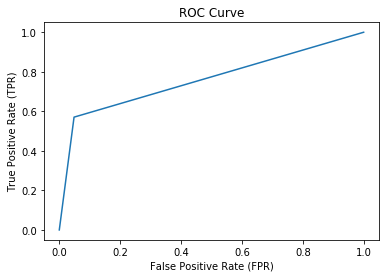

confusion matrix is:
[[4847  247]
 [1979 2629]]
-------------------------------------------------------
accuracy is:
0.770562770563
-------------------------------------------------------
             precision    recall  f1-score   support

         WA       0.71      0.95      0.81      5094
         MA       0.91      0.57      0.70      4608

avg / total       0.81      0.77      0.76      9702



In [164]:
printusefulinfo(classifier_hard,X_train,y_train,X_test,y_test)

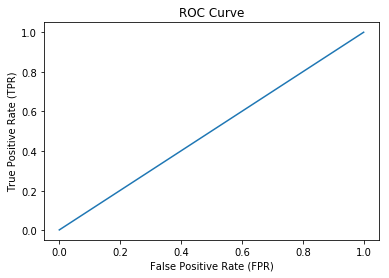

confusion matrix is:
[[5094    0]
 [4599    9]]
-------------------------------------------------------
accuracy is:
0.525974025974
-------------------------------------------------------
             precision    recall  f1-score   support

         WA       0.53      1.00      0.69      5094
         MA       1.00      0.00      0.00      4608

avg / total       0.75      0.53      0.36      9702



In [165]:
printusefulinfo(classifier_soft,X_train,y_train,X_test,y_test)

In [166]:
svc = svm.SVC(kernel='linear')
knumber = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [169]:
from sklearn.model_selection import cross_val_score
scores=[]
for k in knumber:
    print (k)
    svc.C=k
    this_scores = cross_val_score(svc, LSI, y, n_jobs=2)
    scores.append(np.mean(this_scores))

In [177]:
print (scores)

[0.52333240560348826, 0.71209450474688429, 0.72186659244827911, 0.72177381946377217, 0.72069146797785821, 0.72062961932152014, 0.72066054364968923]


In [170]:
desiredknumber=knumber[np.argmax(scores)]

In [173]:
print (desiredknumber)

0.1


In [174]:
classifier_desire = svm.SVC(kernel='linear', C=desiredknumber)

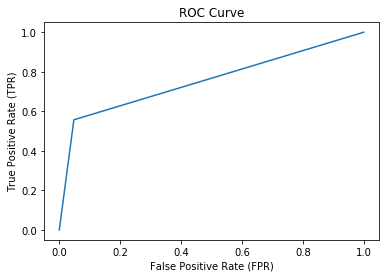

confusion matrix is:
[[4850  244]
 [2041 2567]]
-------------------------------------------------------
accuracy is:
0.764481550196
-------------------------------------------------------
             precision    recall  f1-score   support

         WA       0.70      0.95      0.81      5094
         MA       0.91      0.56      0.69      4608

avg / total       0.80      0.76      0.75      9702



In [176]:
printusefulinfo(classifier_desire,X_train,y_train,X_test,y_test)

use naïve Bayes algorithm

In [178]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

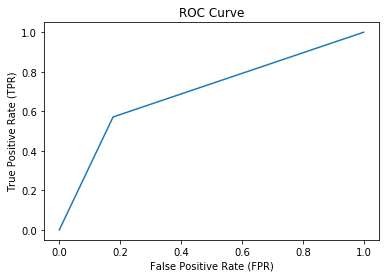

confusion matrix is:
[[4194  900]
 [1975 2633]]
-------------------------------------------------------
accuracy is:
0.703669346526
-------------------------------------------------------
             precision    recall  f1-score   support

         WA       0.68      0.82      0.74      5094
         MA       0.75      0.57      0.65      4608

avg / total       0.71      0.70      0.70      9702



In [179]:
printusefulinfo(gnb,X_train,y_train,X_test,y_test)

use logistic regression

In [181]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

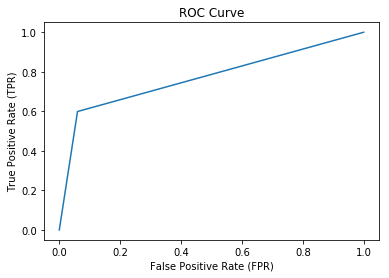

confusion matrix is:
[[4789  305]
 [1848 2760]]
-------------------------------------------------------
accuracy is:
0.778086992373
-------------------------------------------------------
             precision    recall  f1-score   support

         WA       0.72      0.94      0.82      5094
         MA       0.90      0.60      0.72      4608

avg / total       0.81      0.78      0.77      9702



In [182]:
printusefulinfo(logreg,X_train,y_train,X_test,y_test)